In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
import gc

In [2]:
sns.set_context('talk')

# Read the data

In [3]:
dfXtrain = pd.read_csv('preprocessed_csv/train_more.csv', index_col='id')
dfXtest = pd.read_csv('preprocessed_csv/test_more.csv', index_col='id')
dfYtrain = pd.read_csv('preprocessed_csv/y_train_more.csv', header=None, names=['INDEX', 'P_TARGET_FLAG'])

In [4]:
x_train = np.array(dfXtrain)
x_test = np.array(dfXtest)

y_train = np.array(dfYtrain['P_TARGET_FLAG'])

# Save routines

In [5]:
dfYtest = pd.DataFrame({'INDEX': dfXtest.index, 'P_TARGET_FLAG': np.zeros(x_test.shape[0])})
dfYtest.head()

,INDEX,P_TARGET_FLAG
0,3,0.0
1,9,0.0
2,10,0.0
3,18,0.0
4,21,0.0


In [6]:
def save_to_file(y, file_name):
    dfYtest['P_TARGET_FLAG'] = y
    dfYtest.to_csv('results/{}'.format(file_name), index=False)

# Train RF

In [7]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split

In [9]:
def get_score_list(X, y, clf, scorer):
    predictions = list()
    score = list()
    for i, tree in enumerate(clf.estimators_):
        proba = tree.predict_proba(X)[:, 1]
        predictions.append(proba)
        rf_prediction = np.mean(predictions, axis=0)
        score.append(scorer(y, rf_prediction))
    return score

In [8]:
x_subtrain, x_subtest, y_subtrain, y_subtest = train_test_split(x_train, y_train, 
                                                                test_size=0.15, random_state=42,
                                                                stratify=y_train)

In [10]:
%%time

kwargs = {'n_estimators': 1000, 'criterion': 'entropy', 'n_jobs': -1, 'random_state': 56}

clf = RFC(**kwargs)
clf.fit(x_subtrain, y_subtrain)

score = get_score_list(x_subtest, y_subtest, clf, roc_auc_score)

CPU times: user 29.2 s, sys: 1.85 s, total: 31.1 s
Wall time: 13.4 s


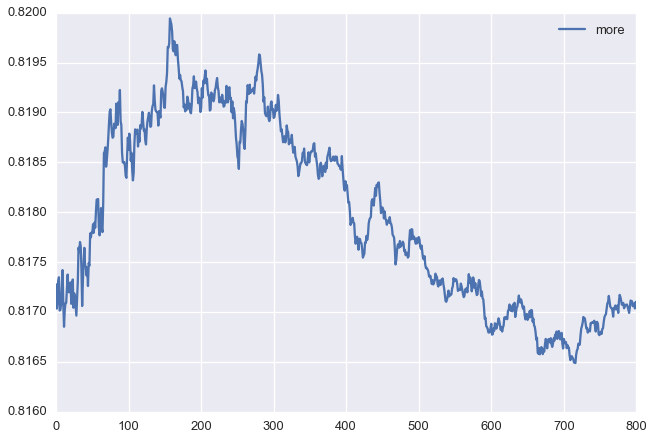

In [11]:
plt.plot(score[200:], label='more')
plt.legend()

In [12]:
x_train = np.array(dfXtrain.reset_index())
x_test = np.array(dfXtest.reset_index())

In [13]:
x_subtrain, x_subtest, y_subtrain, y_subtest = train_test_split(x_train, y_train, 
                                                                test_size=0.15, random_state=42,
                                                                stratify=y_train)

In [14]:
%%time

kwargs = {'n_estimators': 1000, 'criterion': 'entropy', 'n_jobs': -1, 'random_state': 56}

clf = RFC(**kwargs)
clf.fit(x_subtrain, y_subtrain)

score_index = get_score_list(x_subtest, y_subtest, clf, roc_auc_score)

CPU times: user 32.1 s, sys: 235 ms, total: 32.3 s
Wall time: 12.6 s


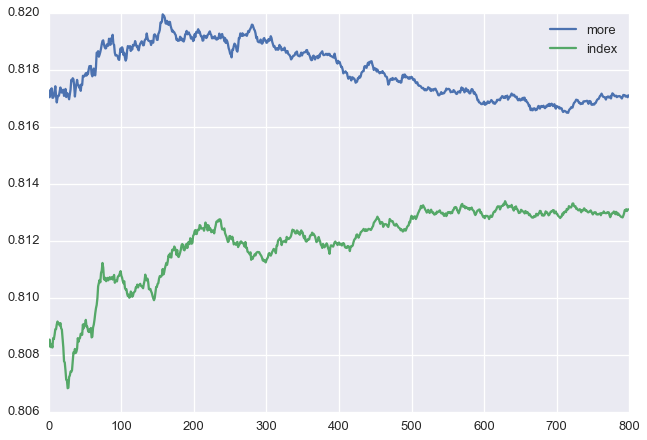

In [15]:
plt.plot(score[200:], label='more')
plt.plot(score_index[200:], label='index')
plt.legend()

Всё-таки индекс бесполезный признак

In [16]:
x_train = np.array(dfXtrain)
x_test = np.array(dfXtest)

In [17]:
x_subtrain, x_subtest, y_subtrain, y_subtest = train_test_split(x_train, y_train, 
                                                                test_size=0.15, random_state=42,
                                                                stratify=y_train)

In [20]:
%%time

kwargs = {'n_estimators': 3000, 'criterion': 'entropy', 'n_jobs': -1, 'random_state': 56}

clf = RFC(**kwargs)
clf.fit(x_train, y_train)

proba = clf.predict_proba(x_test)[:, 1]
save_to_file(proba, 'more_3000.csv')

CPU times: user 1min 33s, sys: 1.01 s, total: 1min 34s
Wall time: 28 s
